### Load Packages

In [1]:
import Module
import tweepy
import json
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

### Connecting to Twitter API

In [2]:
connections = json.load(open('C:/Users/amitt/OneDrive/Code/2020-07-29 Twitter API Keys/connection.json'))
api_key = connections['Twitter API']['API Key']
api_secret_key = connections['Twitter API']['API Secret Key']
bearer_token = connections['Twitter API']['Bearer Token']
access_token = connections['Twitter API']['Access Token']
access_token_secret = connections['Twitter API']['Access Token Secret']

auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

### Sentiment Analysis using TextBlob

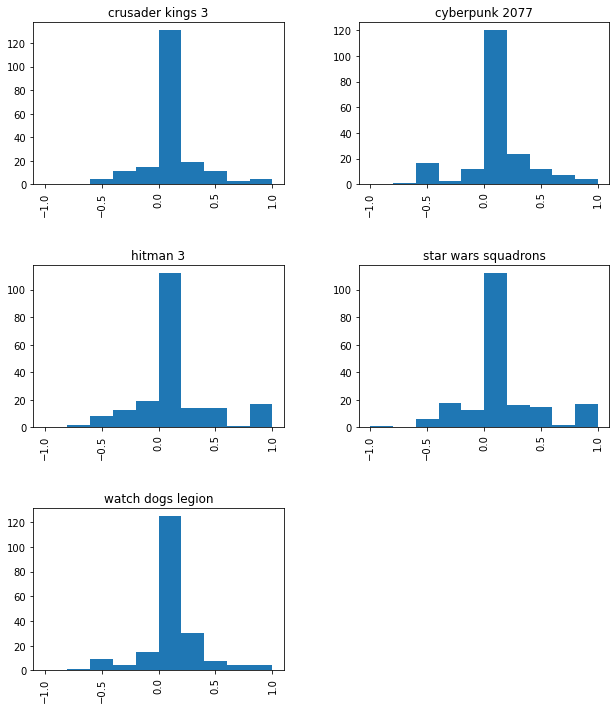

In [10]:
## Create list of search terms and combine into dataframe

search_criteria = ['cyberpunk 2077',
                   'watch dogs legion',
                   'hitman 3',
                   'crusader kings 3',
                   'star wars squadrons'
                   ]

sentiment_df_list = []

for search in search_criteria:
    tweets = tweepy.Cursor(api.search,
                       q=search,
                       lang="en",
                       since='2020-01-01').items(200)
    tweets_no_urls = [Module.remove_url(tweet.text) for tweet in tweets]
    sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]
    sentiment_values = [[str(search), tweet.sentiment.polarity, tweet.sentiment.subjectivity, str(tweet) ] for tweet in sentiment_objects]
    sentiment_values_df = pd.DataFrame(sentiment_values, columns=["search terms", "polarity", "subjectivity", "tweet"])
    sentiment_df_list.append(sentiment_values_df)

sentiment_df = pd.concat(sentiment_df_list)

sentiment_df.hist(column='polarity', by='search terms', figsize = (10,12), range=[-1, 1])

plt.show()

### Resources
http://docs.tweepy.org/en/v3.5.0/getting_started.html <br>
https://towardsdatascience.com/tweepy-for-beginners-24baf21f2c25<br>
http://docs.tweepy.org/en/latest/

Creating The Twitter Sentiment Analysis Program in Python with Naive Bayes Classification<br>
https://towardsdatascience.com/creating-the-twitter-sentiment-analysis-program-in-python-with-naive-bayes-classification-672e5589a7ed<br>

Tweepy, TextBlob and Sentiment Analysis — Python<br>
https://medium.com/@r.ratan/tweepy-textblob-and-sentiment-analysis-python-47cc613a4e51

TextBlob: Simplified Text Processing<br>
https://textblob.readthedocs.io/en/dev/<br>
https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/analyze-tweet-sentiment-in-python/